<a href="https://colab.research.google.com/github/jafetsierra/diabetesProject-backend/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Diagnosis



*   Author: Jafet Israel Sierra Lagos
*   Contact: jafet.sierra.l@gmail.com



## libreries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

## data engineering process

Data obtained from [link text](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

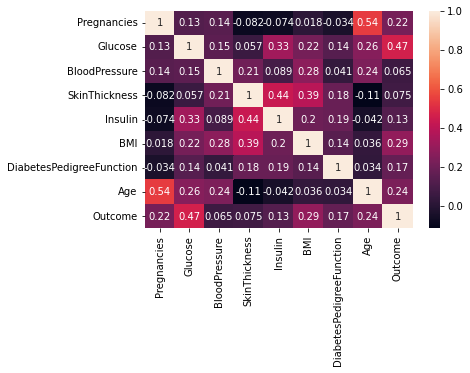

In [5]:
corrM = df.corr()
sn.heatmap(corrM, annot=True)
plt.show()

Even though the diabetesPedigreeFunciton has a considerable correlation with the outcome (tha label), it's not going to be used due the fact that is not that easy to obtain in a real scenario. 

In [37]:
#X will be the input, with all the columns but DiabetesPedigreeFunction and the outcome offcourse
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
#y is the outcome (the label)
y = df['Outcome']

X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [38]:
#searching for null values
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [39]:
#Searching for zero values in the input features
columns = list(X.columns)
zero_count = {}
for column in columns:
  zero_count[column] = (X[column] == 0).sum()
zero_count

{'Age': 0,
 'BMI': 11,
 'BloodPressure': 35,
 'DiabetesPedigreeFunction': 0,
 'Glucose': 5,
 'Insulin': 374,
 'Pregnancies': 111,
 'SkinThickness': 227}

Even though X does not contain null values, there're to many zero values wich indicates that those values were actually not taken. So an **imputaiton process** is needed. 

### imputaiton process

the process will be implemented on all the columns of X except "pregnancies" where a value of zero is perfectly valid. 

In [65]:
from sklearn.impute import KNNImputer
#Keep pregnancies appart
pregnancies = X['Pregnancies']
#Temporal dataframe for the imputation process
temp_x = X[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
#imputaitoon process using nkk neighbors
imputer = KNNImputer(missing_values=0,n_neighbors=5, weights='uniform')
imputed_data = imputer.fit_transform(temp_x)

In [66]:
imputed_data.shape

(768, 7)

In [67]:
imputed_X = pd.DataFrame(imputed_data,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
#now time to add the column of pregnancies to the imputed data
imputed_X['Pregnancies'] = pregnancies
#Finally the data that will be used to the model
imputed_X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,6
1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,1
2,183.0,64.0,23.4,174.6,23.3,0.672,32.0,8
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(imputed_X, alpha=0.2, figsize=(6, 6), diagonal='kde')

## train/test split and data normalization

In [68]:
from sklearn.model_selection import train_test_split

#split the data into train/test datastes with a 15% of the total for test
X_train_pre, X_test_pre, y_train, y_test = train_test_split(imputed_X,y, random_state=1234, test_size=0.15)

In [69]:
print(f'The X_train shape is: {X_train_pre.shape} \nThe X_test shape is: {X_test_pre.shape}')

The X_train shape is: (652, 8) 
The X_test shape is: (116, 8)


### data normalization

In [70]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler().fit(X_train_pre)

#Scaling both the train and test data with the scaler fited on the train only
X_train = scaler.transform(X_train_pre)
X_test  = scaler.transform(X_test_pre)

In [71]:
#mean and std of 0 and 1 respectively after normalization
X_train.mean(axis=0), X_train.std(axis=0)

(array([ 2.88113092e-16,  1.28595158e-15, -6.81118420e-17, -1.34861447e-16,
         6.34802367e-16,  1.36223684e-17, -2.83345263e-16, -1.08978947e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

## unbalance data

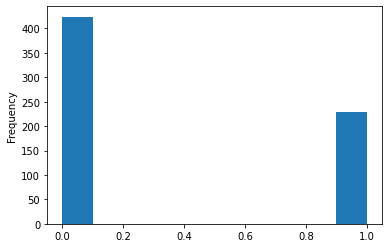

In [72]:
y_train.plot(kind='hist')

As we see, there is an imbalanced. To solve this we're going to use SMOTE

In [55]:
#! pip install imbalanced_learn
from imblearn.over_sampling import SMOTE

In [73]:
oversample = SMOTE(sampling_strategy='minority',k_neighbors=6)
X_train, y_train = oversample.fit_resample(X_train,y_train)

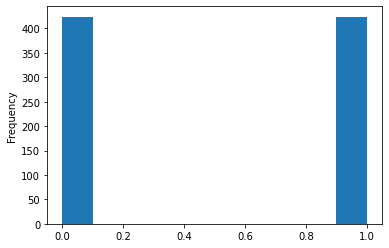

In [74]:
y_train.plot(kind='hist')

## Selecting the best model using cross-validation

[link text](https://scikit-learn.org/stable/modules/cross_validation.html)


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

#list of models that will be used
models = [
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier(),
    lgb.LGBMClassifier()
]

scores = {}

#cross validation
for model in models:
  scores[model] = cross_val_score(model, X_train,y_train, cv=5)


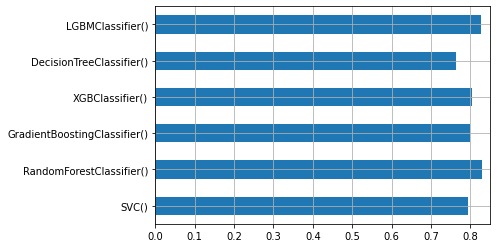

In [76]:
kfold_results = pd.DataFrame.from_dict(scores)
kfold_results.mean().plot(kind='barh',grid=True,xlim=(0,0.85))

## RandomForest model

In [77]:
from sklearn.model_selection import GridSearchCV

rfcls = RandomForestClassifier()

parameters = {
    'criterion':         ['gini','entropy'],
    'max_depth':         list(range(10,50,10)),
    'n_estimators':      list(range(50,500,50)),
}

clf = GridSearchCV(rfcls, parameters,cv=5, scoring='accuracy')

clf.fit(X_train,y_train)

clf.best_params_

{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 400}

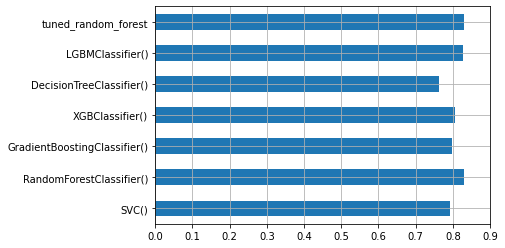

In [78]:
finalcls = RandomForestClassifier(**clf.best_params_)

scores['tuned_random_forest'] = cross_val_score(finalcls, X_train,y_train, cv=5)

final_results = pd.DataFrame.from_dict(scores)
final_results.mean().plot(kind='barh',grid=True,xlim=(0,0.9))

In [79]:
finalcls.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, n_estimators=400)

### predictions

F1 score on the test_set: 0.675
cofusion matrix: 



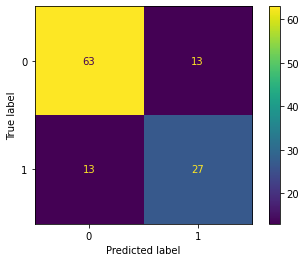

In [80]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = finalcls.predict(X_test)

f1s = f1_score(y_test,y_pred)

cm = confusion_matrix(y_test,y_pred)

print(f'F1 score on the test_set: {f1s}')

print('cofusion matrix: \n')

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## LightGBMClassifier

In [81]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

lightcls = lgb.LGBMClassifier()

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

grid_search = RandomizedSearchCV(
    estimator=lightcls, 
    param_distributions=param_test, 
    scoring='accuracy',
    cv=5,
    refit=True,
    n_iter=200,
    verbose=True)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'colsample_bytree': 0.9331899868044847,
 'learning_rate': 0.4,
 'max_depth': 5,
 'min_child_samples': 114,
 'min_child_weight': 0.001,
 'n_estimators': 800,
 'num_leaves': 43,
 'reg_alpha': 1,
 'reg_lambda': 10,
 'subsample': 0.49957732072898153}

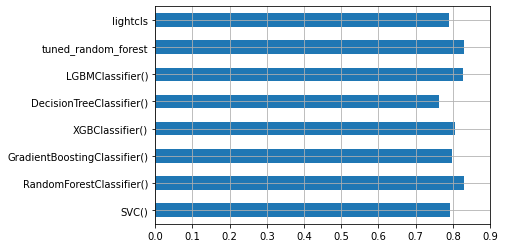

In [82]:
lightcls = lgb.LGBMClassifier(**grid_search.best_params_)

scores['lightcls'] = cross_val_score(lightcls, X_train,y_train, cv=5)

final_results = pd.DataFrame.from_dict(scores)
final_results.mean().plot(kind='barh',grid=True,xlim=(0,0.9))

In [83]:
lightcls.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.9331899868044847, learning_rate=0.4,
               max_depth=5, min_child_samples=114, n_estimators=800,
               num_leaves=43, reg_alpha=1, reg_lambda=10,
               subsample=0.49957732072898153)

### predictions

F1 score on the test_set: 0.6153846153846154
cofusion matrix: 



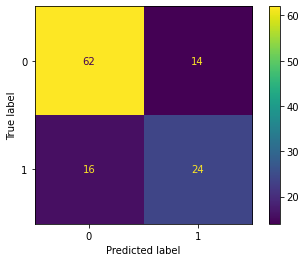

In [84]:
y_pred_light = lightcls.predict(X_test)

f1sl = f1_score(y_test,y_pred_light)

cml = confusion_matrix(y_test,y_pred_light)

print(f'F1 score on the test_set: {f1sl}')

print('cofusion matrix: \n')

disp = ConfusionMatrixDisplay(cml)
disp.plot()
plt.show()